In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
arquivo = 'E:\Dados_do_power_BI\cap_07\Lab02\seguro_saude.csv'.replace("\\","/")
df = pd.read_csv(arquivo)
#eliminando a primeira linha, ela é identica ao cabeçalho e irá atrapalhar as análises
df = df.drop(0)
df = df.reset_index()
df = df.drop(axis = 1, columns=['index'])
display(df)

,idade,sexo,imc,crianca,fumante,regiao,valor_seguro_saude
0,35,masculino,27.74,2,sim,norte,20984.0936
1,63,feminino,31.8,0,nao,sudeste,13880.949
2,40,masculino,41.23,1,nao,norte,6610.1097
3,20,masculino,33,1,nao,sudeste,1980.07
4,40,masculino,30.875,4,nao,nordeste,8162.71625
...,...,...,...,...,...,...,...
1333,19,feminino,20.6,0,nao,sudeste,1731.677
1334,18,masculino,53.13,0,nao,sul,1163.4627
1335,35,masculino,39.71,4,nao,norte,19496.71917
1336,39,feminino,26.315,2,nao,nordeste,7201.70085


In [3]:
df.shape

(1338, 7)

A coluna 'crianca' será eliminada, ela esta totalmente desconexa dos dados e o entendimento de, para que ela realmente serve
é muito dificil.

In [4]:
df = df.drop(axis = 1, columns=['crianca'])

In [5]:
df.describe()

,idade,sexo,imc,fumante,regiao,valor_seguro_saude
count,1338,1336,1338,1337,1337,1338
unique,47,3,548,2,5,1337
top,18,masculino,32.3,nao,sul,1639.5631
freq,69,675,13,1063,363,2


In [6]:
df.dtypes

idade                 object
sexo                  object
imc                   object
fumante               object
regiao                object
valor_seguro_saude    object
dtype: object

Todas as colunas são do tipo objeto, ou sejo o pandas ira interpretalas como texto, ou seja, qualquer operação númerica com as variaveis será impossivel, por isso mudou-se o tipo de coluna de acordo com os dados nela.

In [7]:
#analise descritiva da coluna idade
df.columns

Index(['idade', 'sexo', 'imc', 'fumante', 'regiao', 'valor_seguro_saude'], dtype='object')

In [8]:
display(df)

,idade,sexo,imc,fumante,regiao,valor_seguro_saude
0,35,masculino,27.74,sim,norte,20984.0936
1,63,feminino,31.8,nao,sudeste,13880.949
2,40,masculino,41.23,nao,norte,6610.1097
3,20,masculino,33,nao,sudeste,1980.07
4,40,masculino,30.875,nao,nordeste,8162.71625
...,...,...,...,...,...,...
1333,19,feminino,20.6,nao,sudeste,1731.677
1334,18,masculino,53.13,nao,sul,1163.4627
1335,35,masculino,39.71,nao,norte,19496.71917
1336,39,feminino,26.315,nao,nordeste,7201.70085


In [9]:
#mudando o tipo de dado da coluna idade para o tipo int
df['idade'] = df['idade'].astype('int32')
df['imc'] = df['imc'].astype('float32')
df['valor_seguro_saude'] = df['valor_seguro_saude'].astype('float32')

In [10]:
#verificando valores estranhos na coluna idade
for idade in df['idade']:
    try:
        idade = int(idade)
    except:
        print("não é int")
#coluna idade ok

In [11]:
df['sexo'].unique()
#existem dados estranhos na coluna 'sexo', é preciso limpa-la

array(['masculino', 'feminino', nan, '2'], dtype=object)

In [12]:
#mudando a coluna sexo para o tipo str, visto que as verificação com arrays do numpy são mais dificeis
df['sexo'] = df['sexo'].astype(str)

In [13]:
#essa célula captura os indices com valores estranhos na coluna sexo e os adiciona numa lista
inde = 0
indexs = list()
for sexo in df['sexo']:
    if sexo == 'nan' or sexo == '2':
        indexs.append(inde)
    inde += 1

In [14]:
#dropando as linhas cujo sexo não é identificado
df = df.drop(axis = 'index', index = indexs)
df.shape

(1335, 6)

In [15]:
inde = 0
indexs = list()
for imc in df['imc']:
    try:
        imc = float(imc)
    except:
        print("nao float")
        indexs.append(inde)
    inde += 1
    

In [16]:
df['fumante'] = df['fumante'].astype(str)
df['fumante'].unique()
#existem valores estranhos na coluna fumante, é preciso limpa-la

array(['sim', 'nao', 'nan'], dtype=object)

In [17]:
df[df['fumante'] == 'nan']

,idade,sexo,imc,fumante,regiao,valor_seguro_saude
101,40,feminino,36.189999,nan,sul,5920.104004


In [18]:
#dropando a linha cuja o dado fumanet é um dado estranho
df = df.drop(axis = 'index', index = 101)
df.shape

(1334, 6)

In [19]:
df['regiao'] = df['regiao'].astype(str)
df['regiao'].unique()
#existem dados estranhos na coluna regiao

array(['norte', 'sudeste', 'nordeste', 'sul', 'nan', '1'], dtype=object)

In [20]:
#resetando o indice das colunas
df = df.reset_index()
df = df.drop(axis = 1, columns=['index'])

In [21]:
display(df)

,idade,sexo,imc,fumante,regiao,valor_seguro_saude
0,35,masculino,27.740000,sim,norte,20984.093750
1,63,feminino,31.799999,nao,sudeste,13880.949219
2,40,masculino,41.230000,nao,norte,6610.109863
3,20,masculino,33.000000,nao,sudeste,1980.069946
4,40,masculino,30.875000,nao,nordeste,8162.716309
...,...,...,...,...,...,...
1329,19,feminino,20.600000,nao,sudeste,1731.677002
1330,18,masculino,53.130001,nao,sul,1163.462646
1331,35,masculino,39.709999,nao,norte,19496.718750
1332,39,feminino,26.315001,nao,nordeste,7201.700684


In [22]:
#convertendo a coluna ragiao para o tipo str
df['regiao'] = df['regiao'].astype(str)
df[(df['regiao'] == 'nan') | (df['regiao'] == '1')]

,idade,sexo,imc,fumante,regiao,valor_seguro_saude
206,63,feminino,37.700001,sim,nan,48824.449219
607,41,masculino,40.259998,nao,1,5709.164551


In [23]:
#eliminando as colunas com dados estranhos na coluna fumante
df = df.drop(axis = 'index', index = [206, 607])
df.shape

(1332, 6)

In [24]:
#resetando o indice das colunas
df = df.reset_index()
df = df.drop(axis = 1, columns=['index'])

In [25]:
for valor in df['valor_seguro_saude']:
    try:
        valor = float(valor)
    except:
        print('não float')

In [26]:
df.shape

(1332, 6)

In [27]:
df.to_csv('E:\Dados_do_power_BI\cap_07\Lab02\seguro_saude_limpo.csv')
#salvado o data frame devidamente limpo em outra estrutura de dados

- 1. Qual o gasto total da operadora?
- 2. Qual a idade média dos usuários da operadora?
- 3. Qual o gasto médio por região?
- 4. Qual faixa etária possui maior gasto com seguro saúde por região?
- 5. Crianças tem gasto maior que adultos?
- 6. Qual a proporção de crianças por região?
- 7. O aumento da idade influencia no imc?
- 8. Quem tem maior gasto, homens ou mulheres?
- 9. Se o usuário for mulher, o imc é acima ou abaixo da média?
- 10. Se for homem, com mais de 50 anos e da região Sudeste, o gasto é maior ou menor que a média de gastos da região?

#### 1. Qual o gasto total da operadora?

In [28]:
print(f"{df['valor_seguro_saude'].sum()}")

17675900.0


#### 2. Qual a idade média dos usuários da operadora?

In [29]:
media = np.mean(df['idade'])
print(f"{media:.2f}")

39.19


#### 3. Qual o gasto médio por região?

In [30]:
media_regiao = (df['valor_seguro_saude'].sum())/(len(df['regiao'].unique()))
print(f"{media_regiao:.2f}")

4418975.00


#### 4. Qual faixa etária possui maior gasto com seguro saúde por região?

In [31]:
#verificando faixas etarias
idades = df['idade'].unique()
idades.sort()

In [32]:
print(idades)

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64]


In [33]:
#minha decisão: vou criar faixas etarias de com aplitude de 4 anos começando com 18 anos e indo até 64

faixas = list()
cont = 0
limite = 4
for n in range(0,100,7):
    nova_faixa = idades[cont:limite]
    cont = limite
    limite = limite + 4
    
    faixas.append(nova_faixa)
    
del(faixas[-3:])

for faixa in faixas:
    print(faixa)
    

#faixa 1 - 18 - 21
#faixa 2 - 22 - 25
#faixa 3 - 26 - 29
#faixa 4 - 30 - 33
#faixa 5 - 34 - 37
#faixa 6 - 38 - 41
#faixa 7 - 42 - 45
#faixa 8 - 46 - 49
#faixa 9 - 50 - 53
#faixa 10 - 54 - 57
#faixa 11 - 58 - 61
#faixa 12 - 62 - 65

[18 19 20 21]
[22 23 24 25]
[26 27 28 29]
[30 31 32 33]
[34 35 36 37]
[38 39 40 41]
[42 43 44 45]
[46 47 48 49]
[50 51 52 53]
[54 55 56 57]
[58 59 60 61]
[62 63 64]


#### 4. Qual faixa etária possui maior gasto com seguro saúde por região?

In [34]:
regioes = df['regiao'].unique()

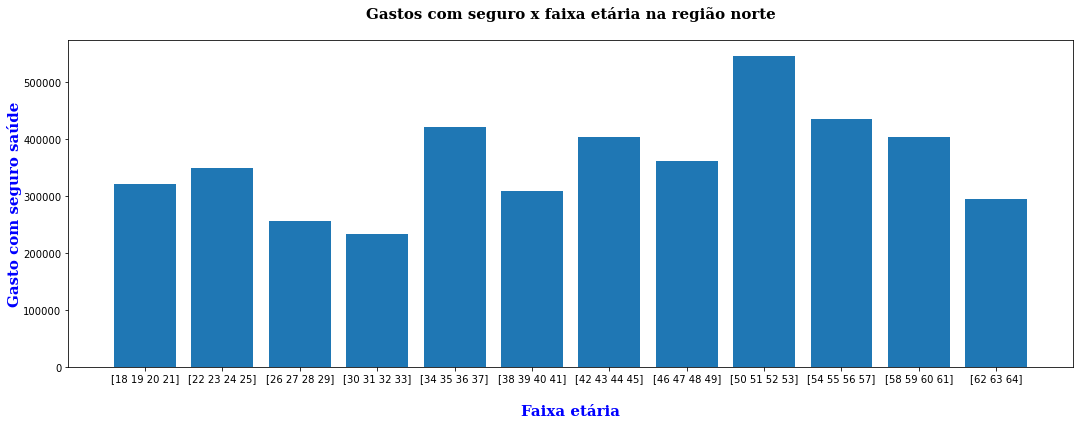

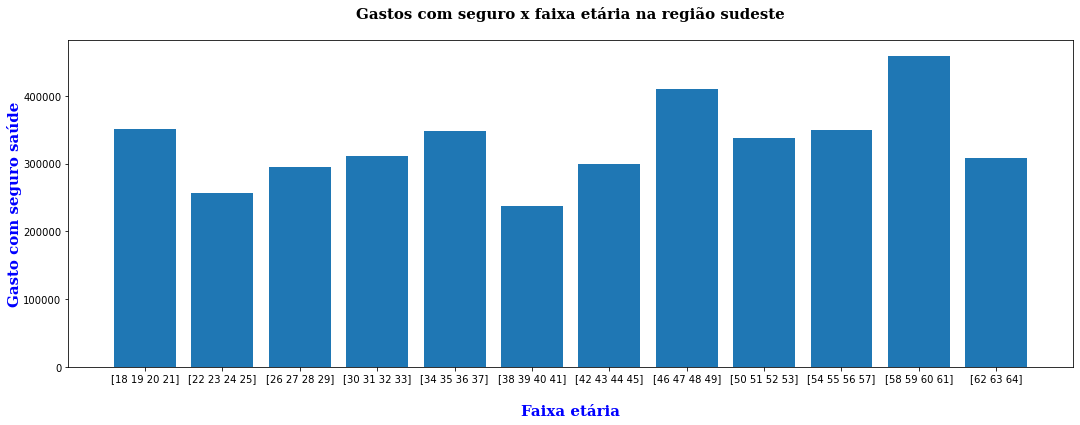

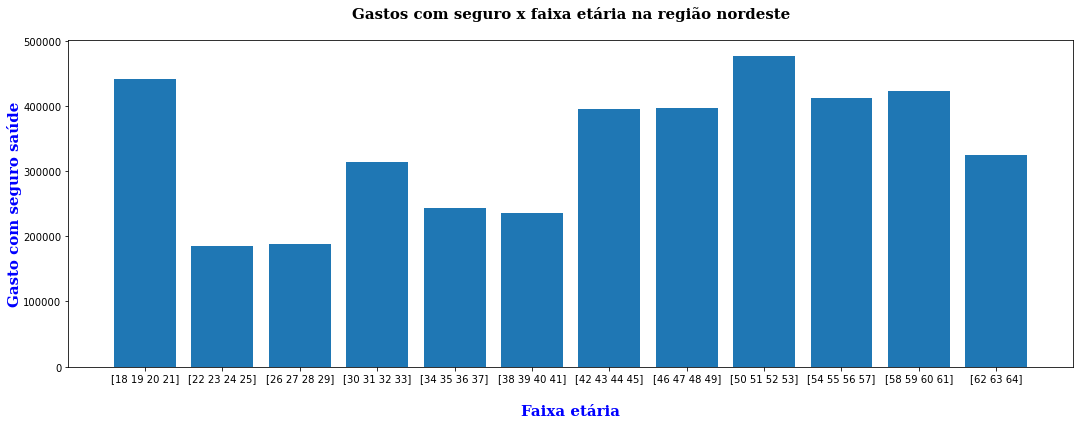

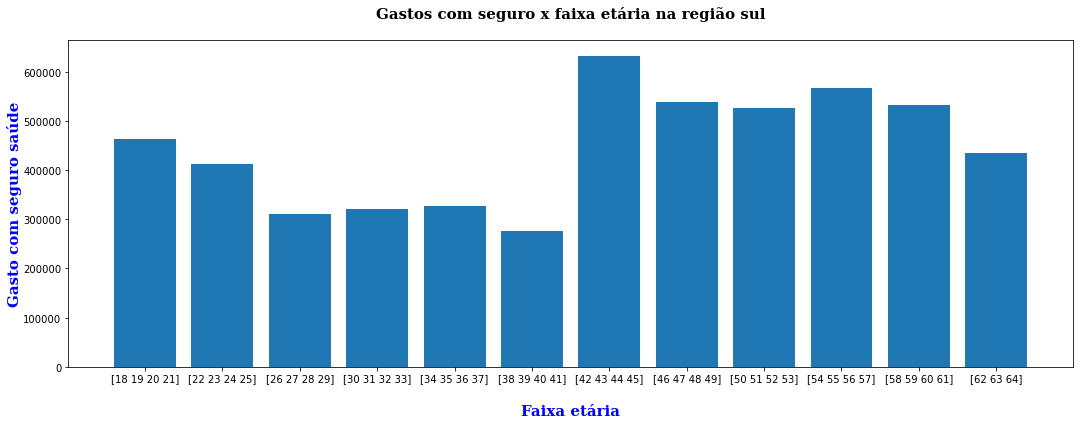

In [35]:
faixasstr =["[18 19 20 21]",
            "[22 23 24 25]",
            "[26 27 28 29]",
            "[30 31 32 33]",
            "[34 35 36 37]",
            "[38 39 40 41]",
            "[42 43 44 45]",
            "[46 47 48 49]",
            "[50 51 52 53]",
            "[54 55 56 57]",
            "[58 59 60 61]",
            "[62 63 64]"]

for regiao in regioes:
    soma_faixa = list()
    for faixa in faixas:
        soma = 0
        for idade in faixa:
            new_df = df[(df['regiao'] == regiao) & (df['idade'] == idade)]
            total = new_df['valor_seguro_saude'].sum()
            soma = soma + total
            
        soma_faixa.append(soma)
    
    data_regiao_faixa_gasto = pd.DataFrame({'Faixas etárias': faixasstr, 'Valor gasto': soma_faixa})
    data_regiao_faixa_gasto.to_csv(f'E:\Dados_do_power_BI\cap_07\Lab02\gasto_x_faixa_{regiao}.csv')
        
    fig, ax = plt.subplots(figsize=(18,6))

    plt.bar(faixasstr, soma_faixa)

    #configuração e estilos do titulo
    plt.title(f"Gastos com seguro x faixa etária na região {regiao}\n", fontdict  = {'fontsize': '15',
                                                                                   'family': 'serif',
                                                                                   'fontweight': 'bold',
                                                                                   'color': 'black' }, loc = 'center')
    #configuração e estilos do label x
    plt.xlabel("\nFaixa etária", fontdict  = {'fontsize': '15',
                                           'family': 'serif',
                                           'fontweight': 'bold',
                                           'color': 'blue' }, loc = 'center')
    #configuração e estilos do label y
    plt.ylabel("Gasto com seguro saúde", fontdict  = {'fontsize': '15',
                                           'family': 'serif',
                                           'fontweight': 'bold',
                                           'color': 'blue', 'verticalalignment': 'baseline',
                                            }, loc = 'center')
    #legenda automatica configuração e posicionamento da 
    
    plt.show()

##### região Norte

Ná região sudeste, a faixa etária de 50 a 53 anos, é a que masi gasta com seguros

##### região sudeste

Ná região sudeste, a faixa etária de 58 a 61 anos, é a que masi gasta com seguros

##### região nordeste

Ná região sudeste, a faixa etária de 50 a 53 anos, é a que masi gasta com seguros

##### região sul

Ná região sudeste, a faixa etária de 43 a 45 anos, é a que masi gasta com seguros

#### 7. O aumento da idade influencia no imc?

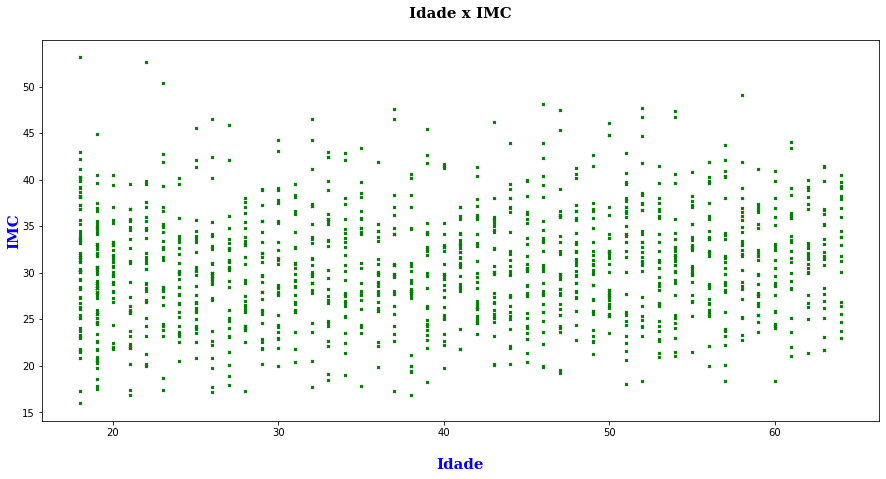

In [36]:
idade = df['idade']
imc = df['imc']

sizes = 7

fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(idade, imc, sizes, color="green", marker= 'x')
ax.set_xlabel("Idade")
ax.set_ylabel("Imc")
#configuração e estilos do titulo
plt.title(f"Idade x IMC\n", fontdict  = {'fontsize': '15',
                                                                               'family': 'serif',
                                                                               'fontweight': 'bold',
                                                                               'color': 'black' }, loc = 'center')
#configuração e estilos do label x
plt.xlabel("\nIdade", fontdict  = {'fontsize': '15',
                                       'family': 'serif',
                                       'fontweight': 'bold',
                                       'color': 'blue' }, loc = 'center')
#configuração e estilos do label y
plt.ylabel("IMC", fontdict  = {'fontsize': '15',
                                       'family': 'serif',
                                       'fontweight': 'bold',
                                       'color': 'blue', 'verticalalignment': 'baseline',
                                        }, loc = 'center')
#legenda automatica configuração e posicionamento da 

plt.show()

Não existe nunhuma relação plausivel, entre idade e IMC

#### 8. Quem tem maior gasto, homens ou mulheres?

In [37]:
sexos = df['sexo'].unique()
print(sexos)

['masculino' 'feminino']


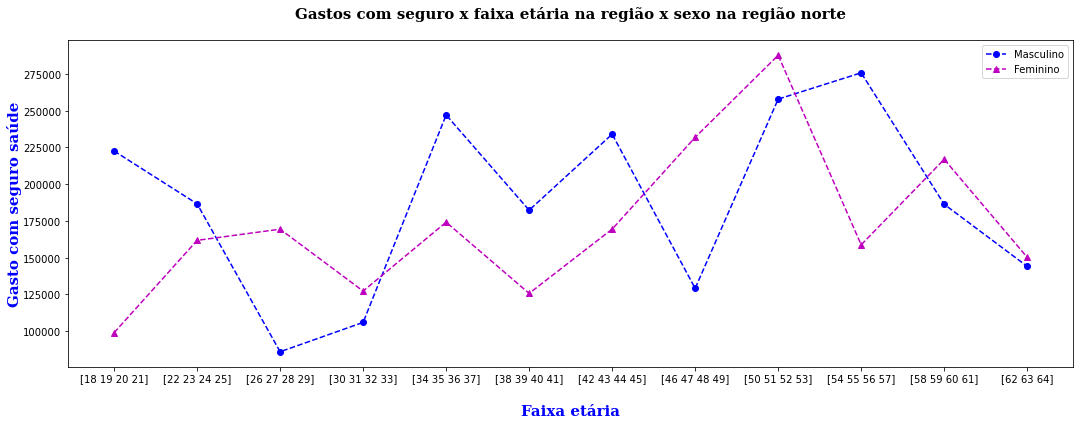

,Masculino,Feminino,Faixa etária,Maior Gasto
0,222600.07,98998.51,"[18, 19, 20, 21]",Masculino
1,186669.84,161826.89,"[22, 23, 24, 25]",Masculino
2,86032.59,169417.91,"[26, 27, 28, 29]",Feminino
3,106025.18,127315.84,"[30, 31, 32, 33]",Feminino
4,247111.66,174187.73,"[34, 35, 36, 37]",Masculino
5,182343.42,125749.03,"[38, 39, 40, 41]",Masculino
6,234051.75,169471.03,"[42, 43, 44, 45]",Masculino
7,129163.99,231896.49,"[46, 47, 48, 49]",Feminino
8,257902.13,287734.71,"[50, 51, 52, 53]",Feminino
9,275788.08,158798.19,"[54, 55, 56, 57]",Masculino


####################################################################################################################




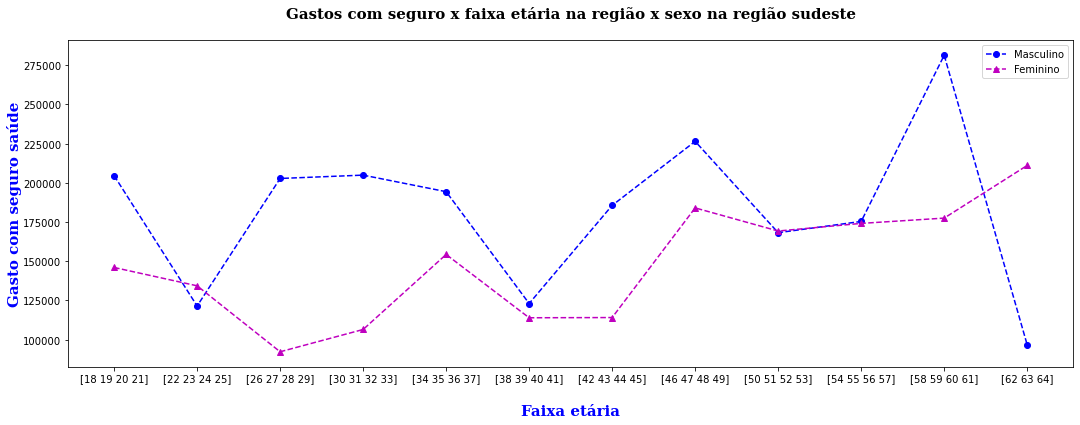

,Masculino,Feminino,Faixa etária,Maior Gasto
0,204614.20,146027.46,"[18, 19, 20, 21]",Masculino
1,121457.01,134342.18,"[22, 23, 24, 25]",Feminino
2,202808.14,92270.93,"[26, 27, 28, 29]",Masculino
3,204935.56,106488.33,"[30, 31, 32, 33]",Masculino
4,194378.02,154340.33,"[34, 35, 36, 37]",Masculino
5,123045.11,113961.00,"[38, 39, 40, 41]",Masculino
6,185620.24,114098.70,"[42, 43, 44, 45]",Masculino
7,226473.67,184031.39,"[46, 47, 48, 49]",Masculino
8,168225.46,169283.77,"[50, 51, 52, 53]",Feminino
9,175401.59,174149.48,"[54, 55, 56, 57]",Masculino


####################################################################################################################




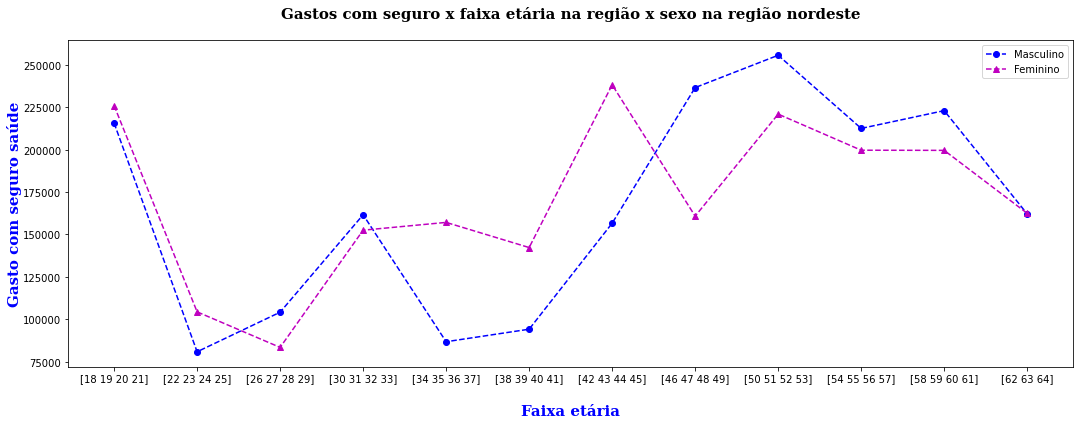

,Masculino,Feminino,Faixa etária,Maior Gasto
0,215588.39,225921.33,"[18, 19, 20, 21]",Feminino
1,80797.04,104320.47,"[22, 23, 24, 25]",Feminino
2,104123.18,83377.40,"[26, 27, 28, 29]",Masculino
3,161554.76,152474.07,"[30, 31, 32, 33]",Masculino
4,86722.20,157054.12,"[34, 35, 36, 37]",Feminino
5,94102.11,142234.44,"[38, 39, 40, 41]",Feminino
6,156575.50,238147.47,"[42, 43, 44, 45]",Feminino
7,236523.34,160744.78,"[46, 47, 48, 49]",Masculino
8,255575.77,220876.25,"[50, 51, 52, 53]",Masculino
9,212454.73,199611.87,"[54, 55, 56, 57]",Masculino


####################################################################################################################




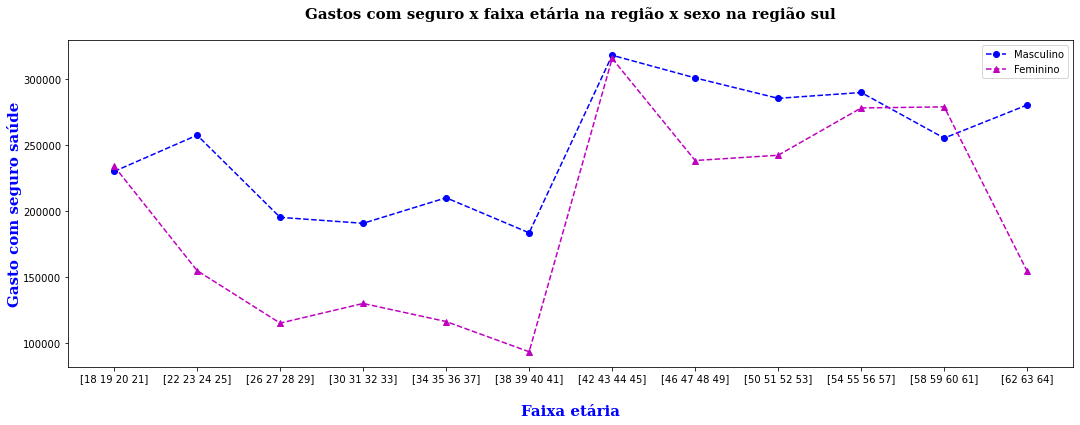

,Masculino,Feminino,Faixa etária,Maior Gasto
0,229926.21,233958.58,"[18, 19, 20, 21]",Feminino
1,257380.03,154942.30,"[22, 23, 24, 25]",Masculino
2,195210.74,115229.41,"[26, 27, 28, 29]",Masculino
3,190718.03,130090.35,"[30, 31, 32, 33]",Masculino
4,210033.12,116413.81,"[34, 35, 36, 37]",Masculino
5,183506.75,93557.59,"[38, 39, 40, 41]",Masculino
6,317806.20,315373.19,"[42, 43, 44, 45]",Masculino
7,300687.54,238210.60,"[46, 47, 48, 49]",Masculino
8,285241.34,242190.96,"[50, 51, 52, 53]",Masculino
9,289645.91,277957.89,"[54, 55, 56, 57]",Masculino


####################################################################################################################



In [38]:
sexos = df['sexo'].unique()
faixasstr =["[18 19 20 21]",
            "[22 23 24 25]",
            "[26 27 28 29]",
            "[30 31 32 33]",
            "[34 35 36 37]",
            "[38 39 40 41]",
            "[42 43 44 45]",
            "[46 47 48 49]",
            "[50 51 52 53]",
            "[54 55 56 57]",
            "[58 59 60 61]",
            "[62 63 64]"]

for regiao in regioes:
    soma_generos = list()
    for sexo in sexos:
        soma_faixa = list()
        for faixa in faixas:
            soma = 0
            for idade in faixa:
                new_df = df[(df['regiao'] == regiao) & (df['idade'] == idade) & (df['sexo'] == sexo)]
                total = new_df['valor_seguro_saude'].sum()
                soma = soma + total
                
            soma_faixa.append(round(soma, 2))
        soma_generos.append(soma_faixa)
    print()
    
    fig, ax = plt.subplots(figsize=(18,6))
    
    plt.plot(faixasstr, soma_generos[0], 'b--', label = 'Masculino', marker = 'o')
    plt.plot(faixasstr, soma_generos[1], 'm--', label = 'Feminino', marker = '^')
    
    plt.title(f"Gastos com seguro x faixa etária na região x sexo na região {regiao}\n", fontdict  = {'fontsize': '15',
                                                                                   'family': 'serif',
                                                                                   'fontweight': 'bold',
                                                                                   'color': 'black' }, loc = 'center')
    #configuração e estilos do label x
    plt.xlabel("\nFaixa etária", fontdict  = {'fontsize': '15',
                                           'family': 'serif',
                                           'fontweight': 'bold',
                                           'color': 'blue' }, loc = 'center')
    #configuração e estilos do label y
    plt.ylabel("Gasto com seguro saúde", fontdict  = {'fontsize': '15',
                                           'family': 'serif',
                                           'fontweight': 'bold',
                                           'color': 'blue', 'verticalalignment': 'baseline',
                                            }, loc = 'center')
    
    ax.legend(loc = 'upper right')
    
    plt.show()
    
    table = pd.DataFrame({'Masculino': soma_generos[0],
                          'Feminino': soma_generos[1], 'Faixa etária': faixas})
    table['Maior Gasto'] = table['Masculino']>table['Feminino']
    table['Maior Gasto'] = table['Maior Gasto'].astype(str)
    table['Maior Gasto'] =  table['Maior Gasto'].replace('True','Masculino')
    table['Maior Gasto'] =  table['Maior Gasto'].replace('False','Feminino')
    table.to_csv(f"E:\Dados_do_power_BI\cap_07\Lab02\Gastos_com_seguroxfaixa_etária_na regiãox_sexo_na_região_{regiao}.csv")
    display(table)
    print("####################################################################################################################")
    print()

Na **região norte**, o **publico Masculino** possui os maiores gastos com seguro saude nas faixas etárias de 18 a 25 anos,
de 34 a 45 anos e de 54 a 57 anos, enquanto o **público Feminino** possui os maiores gastos com saude nas faixas
25 a 33 anos, dos 45 aos 53 anos, e dos 58 aos 64 anos de idade.

Na **regiao sudeste**, o **publico Masculino** possui os maiores gastos com seguro saude nas faixas etárias de 18 aos 21 anos,
de 26 a 49 anos e dos 58 aos 61 anos de idade, enquanto o **públibo feminino** possui os maiores gastos com saúde nas faixas
etárias de 22 aos 25 anos, dos 62 aos 64 anos de idade. nas faixas de 50 a 57 anos, ambos possuem gastos similares cuja a diferença é irrelevante.

Na **regiao nordeste**, o **publico Masculino** possui os maiores gastos com seguro saude nas faixas etárias de 26 aos 33 anos,
e dos 46 a 61 anos de idade, enquanto o **públibo feminino** possui os maiores gastos com saúde nas faixas
etárias de 18 aos 25 anos, dos 34 aos 45 anos de idade. nas faixas de 62 a 64 anos, ambos possuem gastos similares cuja a diferença é irrelevante.

Na **regiao sul**, o **publico Masculino** possui os maiores gastos com seguro saude nas faixas etárias de 22 aos 41 anos,
dos 46 a 57 anos e dos 62 aos 64 anos de idade, enquanto o **públibo feminino** possui os maiores gastos com saúde nas faixas
etárias de 58 aos 61 anos de idade, dos 18 aos 21 e dos 42 aos 45 ambos possuem gastos similares cuja a diferença é irrelevante.

#### 9. Se o usuário for mulher, o imc é acima ou abaixo da média?

Existe uma tendencia das mulheres estarem abaixo do imc médio em suas respectivas faixas de idade

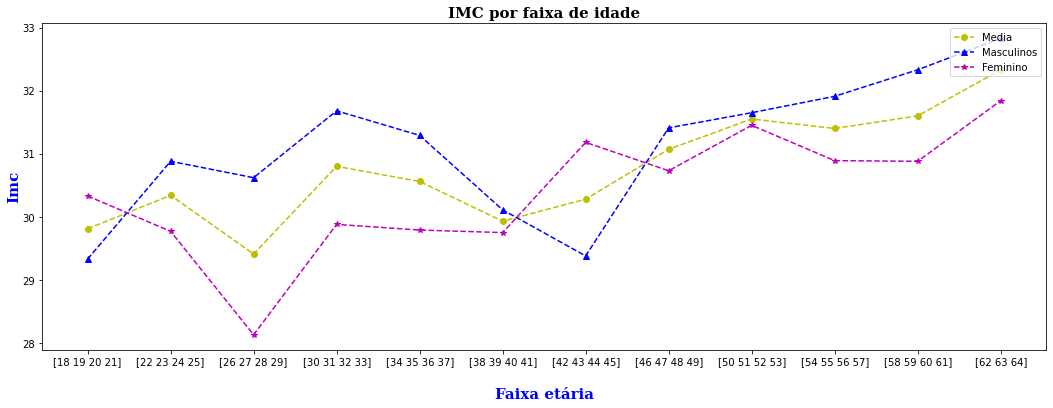

,Faixa,Media imc,IMC masculino médio,IMC feminino médio
0,"[18, 19, 20, 21]",29.81,29.33,30.33
1,"[22, 23, 24, 25]",30.34,30.88,29.77
2,"[26, 27, 28, 29]",29.41,30.62,28.13
3,"[30, 31, 32, 33]",30.80,31.68,29.88
4,"[34, 35, 36, 37]",30.56,31.29,29.79
5,"[38, 39, 40, 41]",29.93,30.11,29.75
6,"[42, 43, 44, 45]",30.28,29.38,31.18
7,"[46, 47, 48, 49]",31.07,31.41,30.73
8,"[50, 51, 52, 53]",31.55,31.65,31.45
9,"[54, 55, 56, 57]",31.40,31.91,30.89


In [39]:
#primeiro - calcular o IMC medio em todas as faixas etarias
media_faixa = list()

for faixa in faixas:
    cont = 0
    corr = 0
    for value in faixa:
        new_df = df[df['idade'] == value]
        corr = corr + new_df.shape[0]
        cont = cont + new_df['imc'].sum()
    media_faixa.append(round((cont/corr), 2))


media_faixa_masculino = list()
for faixa in faixas:
    cont = 0
    corr = 0
    for value in faixa:
        new_df = df[(df['idade'] == value) & (df['sexo'] == 'masculino')]
        corr = corr + new_df.shape[0]
        cont = cont + new_df['imc'].sum()
    media_faixa_masculino.append(round((cont/corr), 2))


media_faixa_feminino = list()
for faixa in faixas:
    cont = 0
    corr = 0
    for value in faixa:
        new_df = df[(df['idade'] == value) & (df['sexo'] == 'feminino')]
        corr = corr + new_df.shape[0]
        cont = cont + new_df['imc'].sum()
    media_faixa_feminino.append(round((cont/corr), 2))



fig, ax = plt.subplots(figsize=(18,6))
    
plt.plot(faixasstr, media_faixa, 'y--', label = 'Media', marker = 'o')
plt.plot(faixasstr, media_faixa_masculino, 'b--', label = 'Masculinos', marker = '^')
plt.plot(faixasstr, media_faixa_feminino, 'm--', label = 'Feminino', marker = '*')

plt.title(f"IMC por faixa de idade", fontdict  = {'fontsize': '15',
                                                                               'family': 'serif',
                                                                               'fontweight': 'bold',
                                                                               'color': 'black' }, loc = 'center')
#configuração e estilos do label x
plt.xlabel("\nFaixa etária", fontdict  = {'fontsize': '15',
                                       'family': 'serif',
                                       'fontweight': 'bold',
                                       'color': 'blue' }, loc = 'center')
#configuração e estilos do label y
plt.ylabel("Imc", fontdict  = {'fontsize': '15',
                                       'family': 'serif',
                                       'fontweight': 'bold',
                                       'color': 'blue', 'verticalalignment': 'baseline',
                                        }, loc = 'center')

ax.legend(loc = 'upper right')

plt.show()

tabela_imc = pd.DataFrame({'Faixa': faixas ,'Media imc': media_faixa, 'IMC masculino médio': media_faixa_masculino,
                           'IMC feminino médio': media_faixa_feminino})
tabela_imc.to_csv(f"E:\Dados_do_power_BI\cap_07\Lab02\IMC por faixa de idade.csv".replace(" ","_"))
display(tabela_imc)

#### 10. Se for homem, com mais de 50 anos e da região Sudeste, o gasto é maior ou menor que a média de gastos da região?

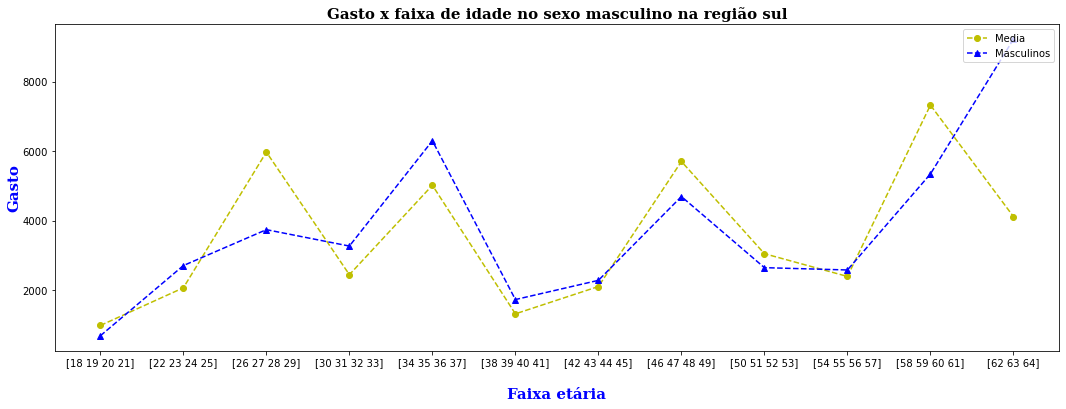

,Faixa etaria,Média total,Media masculina
0,"[18, 19, 20, 21]",684.06,980.52
1,"[22, 23, 24, 25]",2705.70,2065.69
2,"[26, 27, 28, 29]",3740.03,5974.95
3,"[30, 31, 32, 33]",3267.66,2443.56
4,"[34, 35, 36, 37]",6300.46,5019.20
5,"[38, 39, 40, 41]",1726.94,1315.82
6,"[42, 43, 44, 45]",2280.19,2102.02
7,"[46, 47, 48, 49]",4693.69,5703.88
8,"[50, 51, 52, 53]",2645.70,3047.80
9,"[54, 55, 56, 57]",2579.06,2392.92


In [40]:
total_faixa = list()
for faixa in faixas:
    cont = 0
    corr = 0
    for value in faixa:
        new_df = df[(df['idade'] == value) & (df['regiao'] == 'sudeste')]
        corr = corr + new_df.shape[0]
        total = new_df['valor_seguro_saude'].sum()
    total_faixa.append(round(total/corr, 2))


total_faixa_masculino = list()
for faixa in faixas:
    cont = 0
    corr = 0
    for value in faixa:
        new_df = df[(df['idade'] == value) & (df['sexo'] == 'masculino') & (df['regiao'] == 'sudeste')]
        corr = corr + new_df.shape[0]
        total = new_df['valor_seguro_saude'].sum()
    total_faixa_masculino.append(round(total/corr, 2))
    
gastos_homens_rela_media = pd.DataFrame({"Faixa etaria": faixas, "Média total": total_faixa, "Media masculina": total_faixa_masculino})
gastos_homens_rela_media.to_csv(f"E:\Dados_do_power_BI\cap_07\Lab02\gastos_homens_rela_media.csv")

fig, ax = plt.subplots(figsize=(18,6))
    
plt.plot(faixasstr, total_faixa_masculino, 'y--', label = 'Media', marker = 'o')
plt.plot(faixasstr, total_faixa, 'b--', label = 'Masculinos', marker = '^')

plt.title(f"Gasto x faixa de idade no sexo masculino na região {regiao}", fontdict  = {'fontsize': '15',
                                                                               'family': 'serif',
                                                                               'fontweight': 'bold',
                                                                               'color': 'black' }, loc = 'center')
#configuração e estilos do label x
plt.xlabel("\nFaixa etária", fontdict  = {'fontsize': '15',
                                       'family': 'serif',
                                       'fontweight': 'bold',
                                       'color': 'blue' }, loc = 'center')
#configuração e estilos do label y
plt.ylabel("Gasto", fontdict  = {'fontsize': '15',
                                       'family': 'serif',
                                       'fontweight': 'bold',
                                       'color': 'blue', 'verticalalignment': 'baseline',
                                        }, loc = 'center')

ax.legend(loc = 'upper right')

plt.show()

display(gastos_homens_rela_media)

dos 50 aos 53 os gastos com saude são um pouco abaixo da média para esse público, dos 54 aos 57 anos de idade os gastos com
saúde são brevemente maiores, voltando na cair na faixa 54 aos 57 anos, sendo maiores que a média na faixa de 62 aos 64 anos
de idade